# Autoencoders

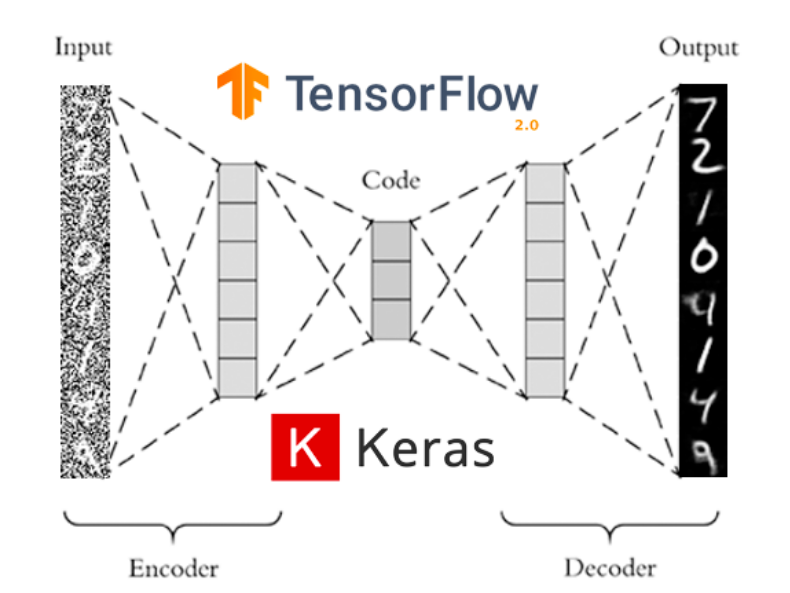

## 1. Autoencoders y latent spaces with MNIST.


In this project we are going to use the MNIST dataset to implement our own ***AUTOENCODER***, and with it, extract vectors from our latent space. 

We could also use other datasets like ***Fashion MNIST*** (of fashion accessories) or ***notMNIST*** (of different typographies).

---

**Task:** Implement the autoencoder model. In this case we will build the ***encoder*** and ***decoder*** models as independent parts, and then join them together to form the final model: The Autoencoder.

**Question**: Which activation function do you think is better to use in the last layer of the ***decoder***: *ReLU*, *Sigmoide* or *Softmax*, why?

Once the *autoencoder* is built and working do the following:

1. Make the autoencoder only have two neurons in its bottleneck and train the model. Once you have it, visualize an input image and the output reconstructed by the network. Is it a good reconstruction? If you are not convinced of the result, check that the autoencoder has done its job by displaying a ***scatter plot*** where each latent variable is represented on an axis, and where each class is displayed in a color. If the model is correct, you should see how numbers of similar classes will be in close positions forming clusters.


In [1]:
import numpy as np
import scipy as sc
import sklearn as sk
import pandas  as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load the MNIST dataset
mnist = np.genfromtxt('./sample_data/mnist_train_small.csv', delimiter=',')

X = mnist[:, 1: ]
Y = OneHotEncoder().fit_transform(mnist[:, 0:1]).toarray()

# Scale the value of X
X = X / 255.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [2]:
from tensorflow.keras.layers import *
from tensorflow.keras import *
from tensorflow.keras.optimizers import *

size = int(np.sqrt(X_train.shape[1]))

z = 16 # Size of the middle array of the autoencoder

# Input for the encoder
inpE = Input(shape=(size, size, 1))     # BSx28x28x1

# Transform to an unidimensional array
x = Flatten()(inpE)                     # BSx784
x = Dense(256, activation='relu')(x)    # BSx256
x = Dense(128, activation='relu')(x)    # BSx128
x = Dense(64,  activation='relu')(x)    # BSx64

# The last layer of the encoder give us the latent vector
c = Dense(z)(x)                         # BSxZ 

# Input of the decoder
inpD = Input(shape=c.shape[1:])         # BSxZ

# Reverse the steps of the encoder
x = Dense(64,  activation='relu')(inpD) # BSx64
x = Dense(128, activation='relu')(x)    # BSx128
x = Dense(256, activation='relu')(x)    # BSx256
x = Dense(784, activation='sigmoid')(x) # BSx784

# Finally we recover the original shape of the image
x = Reshape(inpE.shape[1:])(x)          # BSx28x28x1

" -------- "

# Now, to have the control of all the parts of the model,
# each part will be defined separately

# The encoder will be a model whose input will be the encoder input and the output the code

# The decoder will be a model whose input is the decoder input and the output is the recovered image
encoder = Model(inputs=inpE, outputs=c)
decoder = Model(inputs=inpD, outputs=x)

# Now we have to conect the encoder and the decoder

autoencoder = Model(inputs=inpE, outputs=decoder(encoder(inpE)))

# Compile and optimize
autoencoder.compile(optimizer=SGD(5), loss='mse')

autoencoder.fit(X_train.reshape(-1, size, size, 1), 
                X_train.reshape(-1, size, size, 1),
                validation_data=(X_test.reshape(-1, size, size, 1), 
                                 X_test.reshape(-1, size, size, 1)),
                epochs=100,
                batch_size=128)

Epoch 1/100
118/118 [==============================] - 3s 8ms/step - loss: 0.0996 - val_loss: 0.0722
Epoch 2/100
118/118 [==============================] - 1s 6ms/step - loss: 0.0651 - val_loss: 0.0653
Epoch 3/100
118/118 [==============================] - 1s 6ms/step - loss: 0.0614 - val_loss: 0.0609
Epoch 4/100
118/118 [==============================] - 1s 6ms/step - loss: 0.0594 - val_loss: 0.0593
Epoch 5/100
118/118 [==============================] - 1s 6ms/step - loss: 0.0570 - val_loss: 0.0559
Epoch 6/100
118/118 [==============================] - 1s 6ms/step - loss: 0.0537 - val_loss: 0.0523
Epoch 7/100
118/118 [==============================] - 1s 6ms/step - loss: 0.0501 - val_loss: 0.0488
Epoch 8/100
118/118 [==============================] - 1s 6ms/step - loss: 0.0456 - val_loss: 0.0446
Epoch 9/100
118/118 [==============================] - 1s 6ms/step - loss: 0.0429 - val_loss: 0.0421
Epoch 10/100
118/118 [==============================] - 1s 6ms/step - loss: 0.0411 - val_lo

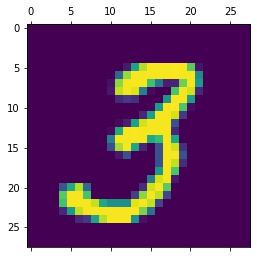

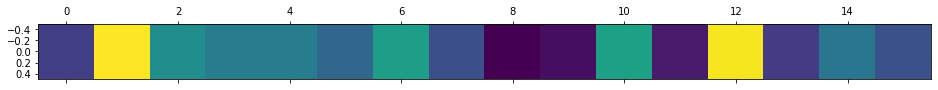

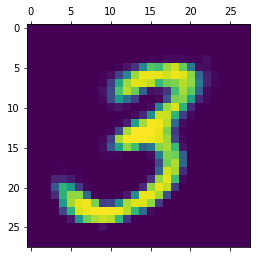

In [3]:
im = 20

plt.matshow(X_test[im:(im+1)].reshape(size, size))
plt.matshow(encoder((X_test[im:(im+1)].reshape(1, size, size, 1))))
plt.matshow(decoder(encoder((X_test[im:(im+1)].reshape(1, size, size, 1))))[0,:,:,0])

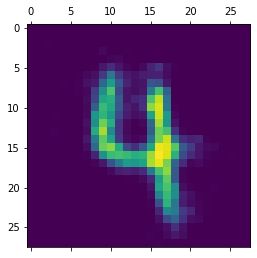

In [4]:
#@title Number fields { run: "auto" }
i = 0.2 #@param {type:"slider", min:0, max:1, step:0.1}

idx1 = 250
idx2 = 255         

x1 = X_test.reshape(-1, size, size)[idx1]
x2 = X_test.reshape(-1, size, size)[idx2]

v1 = encoder.predict(x1[np.newaxis, :, :, np.newaxis])
v2 = encoder.predict(x2[np.newaxis, :, :, np.newaxis])

y1 = decoder.predict(v1)
y2 = decoder.predict(v2)

# plt.matshow(x1)
# plt.matshow(x2)
# plt.matshow(y1[0,:,:,0])
# plt.matshow(y2[0,:,:,0])

plt.matshow(decoder.predict((i * v1 + (1 - i) * v2))[0,:,:,0])
plt.show()

## 2. Convolutional Autoencoder

---

**Task:** Use as reference the ***Autoencoder*** from the previous exercise to design now a ***Convolutional Autoencoder*** that follows the design of the image below. To do this, the parameters of the *Conv2D()* layer - for example the *filters*, *kernel_size* and the *strides* parameters - must be defined correctly and the dimensions must be checked to ensure that they match what is expected. In this case, this architecture does not make use of ***MaxPooling()*** layers. The use of this type of layers is discussed and we can have the same option to reduce the spatial size of each image by making use of the *stride* of the filters.

<center><img src="https://www.researchgate.net/profile/Xifeng_Guo/publication/320658590/figure/fig1/AS:614154637418504@15234372844108/The-structure-of-proposed-Convolutional-AutoEncoders-CAE-for-MNIST-In-the-middle-there.png" alt="Drawing" width="600px"/></center>

**(Bonus)** After designing and training the ***Convolutional Autoencoder*** correctly, experiment with the following model properties:

> **1. Autoencoder Denoiser :** Generate an image with noise and check that the model is able to remove it. Try different ones with different noise levels until reconstruction is not possible. At that point, try adding noise to the *input* (use the function implemented in previous projects) and train the ***autoencoder*** to check if the model is able to act as a *denoiser*.

> **2. Interpolations :** Generate latent vectors for two types of images and visualize them. Then do mathematical interpolation between the two vectors, for different degrees of blending, and with the resulting vectors, reconstruct the images with the *Decoder()*. Does any interpolation occur? Can you think of another type of network that could generate better quality interpolations?


In [5]:
import numpy as np
import scipy as sc
import sklearn as sk
import pandas  as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load the MNIST dataset
mnist = np.genfromtxt('./sample_data/mnist_train_small.csv', delimiter=',')

size = 28
X = mnist[:, 1: ].reshape(-1, size, size, 1)
Y = OneHotEncoder().fit_transform(mnist[:, 0:1]).toarray()

# Scale the value of X
X = X / 255.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [6]:
from tensorflow.keras import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *

z = 10

# Input layer             Shape = BSx28x28x1
iE = Input((size, size, 1))
# 1ª Convolutional layer. Shape = BSx14x14x32
x = Conv2D(filters=32,  kernel_size=3, strides=2, padding='same', activation='relu')(iE)
# 2ª Convolutional layer. Shape = BSx7x7x64
x = Conv2D(filters=64,  kernel_size=3, strides=2, padding='same', activation='relu')(x)
# 3ª Convolutional layer. Shape = BSx14x14x128
x = Conv2D(filters=128, kernel_size=3, strides=2, activation='relu')(x)
# Dense layer.            Shape = BSx1152
x = Flatten()(x)
c = Dense(units=z, activation='relu')(x)

enc = Model(inputs=iE, outputs=c)

iD = Input(z)
# Dense layer        
x = Dense(units=1152, activation='relu')(iD)
# Rehsape of the dense layer
x = Reshape((enc.layers[-3].output_shape[1:]))(x)
# 
x = Conv2DTranspose(filters=64, kernel_size=3, strides=2, activation='relu')(x)
#
x = Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding="same", activation='relu')(x)
#
x = Conv2DTranspose(filters=1,  kernel_size=3, strides=2, padding="same", activation='sigmoid')(x)

# Creation of the decoder
dec = Model(inputs=iD, outputs=x)

# Creation of the autoencoder model
aut = Model(inputs=iE, outputs=dec(enc(iE)))

aut.compile(optimizer=Adam(lr=0.001), loss='mse')
h1 = aut.fit(X_train, X_train, validation_data=(X_test, X_test), epochs=25, batch_size=16)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


938/938 [==============================] - 16s 9ms/step - loss: 0.0607 - val_loss: 0.0414
Epoch 2/25
938/938 [==============================] - 8s 9ms/step - loss: 0.0394 - val_loss: 0.0381
Epoch 3/25
938/938 [==============================] - 8s 9ms/step - loss: 0.0356 - val_loss: 0.0346
Epoch 4/25
938/938 [==============================] - 8s 9ms/step - loss: 0.0335 - val_loss: 0.0331
Epoch 5/25
938/938 [==============================] - 8s 8ms/step - loss: 0.0324 - val_loss: 0.0320
Epoch 6/25
938/938 [==============================] - 8s 8ms/step - loss: 0.0307 - val_loss: 0.0292
Epoch 7/25
938/938 [==============================] - 8s 9ms/step - loss: 0.0283 - val_loss: 0.0279
Epoch 8/25
938/938 [==============================] - 8s 8ms/step - loss: 0.0272 - val_loss: 0.0274
Epoch 9/25
938/938 [==============================] - 8s 9ms/step - loss: 0.0265 - val_loss: 0.0267
Epoch 10/25
938/938 [==============================] - 8s 8ms/step - loss: 0.0259 - val_loss: 0.0264
Epoch 11/

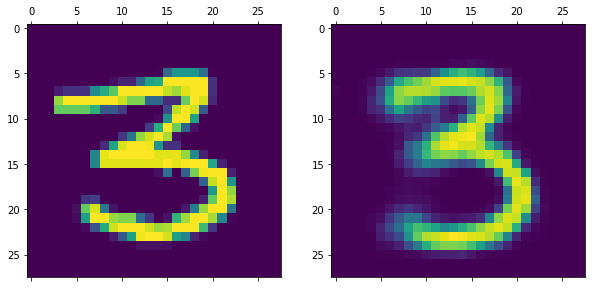

In [7]:
fig, axs = plt.subplots(1,2, figsize=(10, 10))

im = 0

axs[0].matshow(X_train[im,:,:,0])
axs[1].matshow(aut.predict(X_train)[0,:,:,0])

(-0.5, 27.5, 27.5, -0.5)

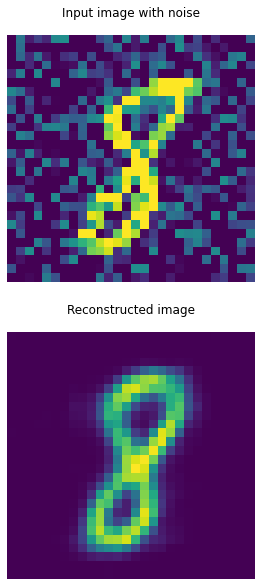

In [8]:
from tensorflow.keras.preprocessing.image import *

i = 0
f = 0.25

def add_noise(img, f):
    noise = (np.random.rand(28, 28, 1) * 2 - 1) * f
    img = np.clip(img + noise, 0., 1.)
    return img

# Image generator with 50% of noise
n50_datagen = ImageDataGenerator(preprocessing_function=lambda x: add_noise(x, 0.50))

fig, axs = plt.subplots(2, 1, figsize=(5, 10))
fig.tight_layout = True

# Image with noise, visualization
img = next(n50_datagen.flow(X_test))

axs[0].matshow(img[0,:,:,0])
axs[0].set_title('Input image with noise')
axs[0].axis('off')
# Visualization of the reconstructed image by the autoencoder
axs[1].matshow(aut.predict(img)[0,:,:,0])
axs[1].set_title('Reconstructed image')
axs[1].axis('off')

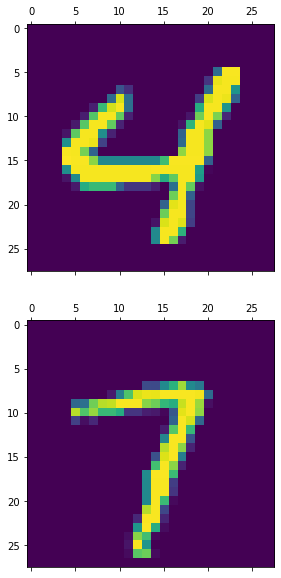

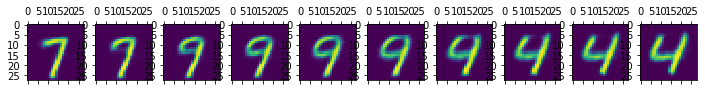

In [9]:
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
fig.tight_layout = True

# Generated images with noise
img1 = X_test[0:1].reshape(1, 28, 28, 1)
img2 = X_test[4:5].reshape(1, 28, 28, 1)

# Visualization of the images
axs[0].matshow(img1[0,:,:,0])
axs[1].matshow(img2[0,:,:,0])

cod1 = enc(img1)
cod2 = enc(img2)


fig, axs = plt.subplots(1, 10, figsize=(12, 12))

for i in range(10):

  f = i / 10
  codM = cod1 * f + cod2 * (1 - f)
  imgM = dec(codM)
  axs[i].matshow(imgM[0,:,:,0])